A company wants to predict the sales of its product based on the money spent
on different platforms for marketing. They want you to figure out how they can
spend money on marketing in the future in such a way that they can increase their
profit as much as possible built-in docker and use some library to display that in
frontend

In [1]:
import pandas as pd  


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns           

In [2]:
df = pd.read_csv("advertising.csv")
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


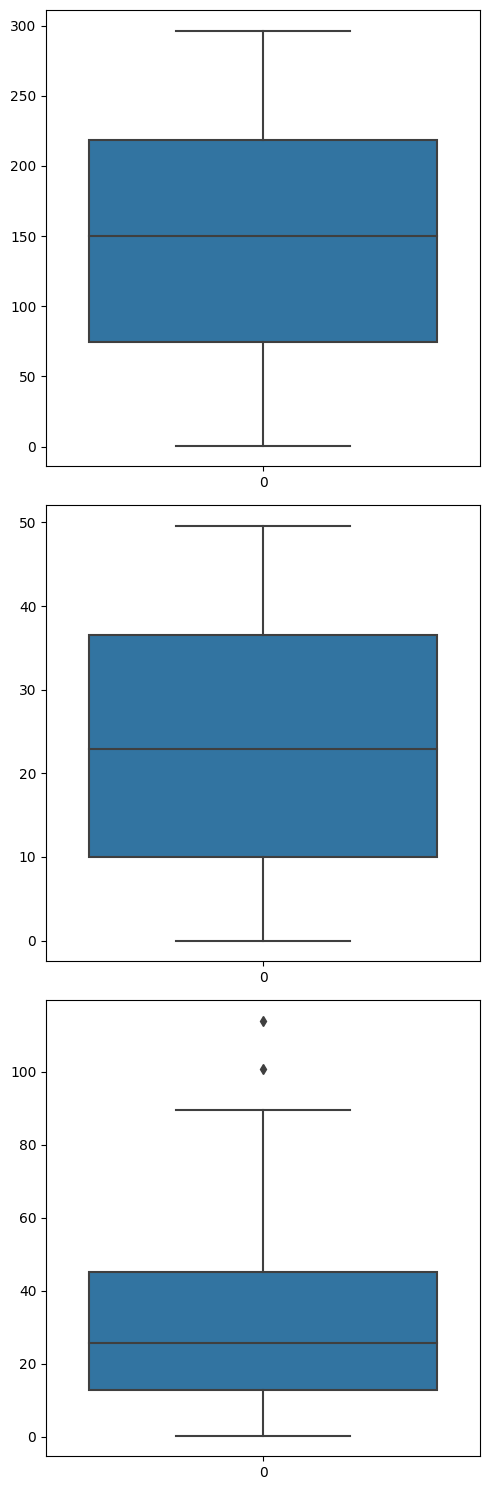

In [6]:
fig, axs = plt.subplots(3,figsize=(5,15))

sns.boxplot(df['TV'],ax=axs[0])
sns.boxplot(df['Radio'],ax=axs[1])
sns.boxplot(df['Newspaper'],ax=axs[2])
plt.tight_layout()
plt.show()

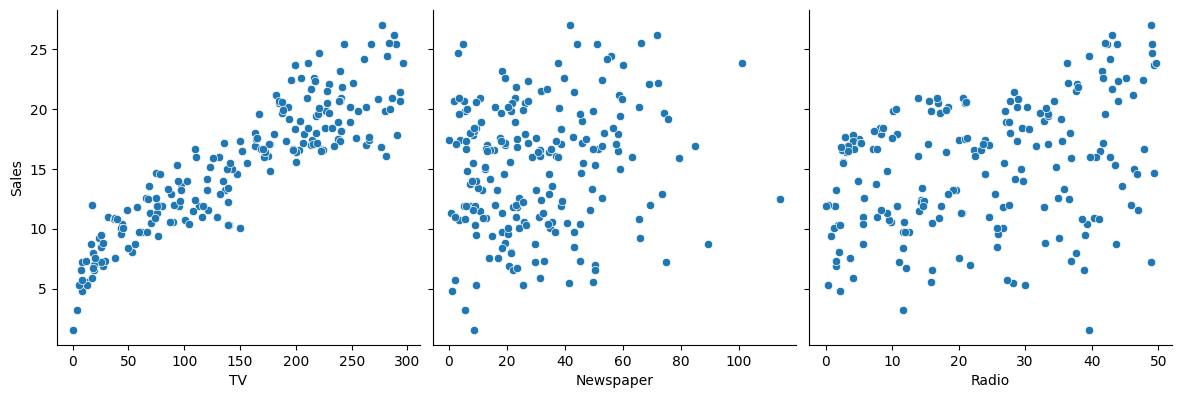

In [7]:
sns.pairplot(df, x_vars=["TV","Newspaper","Radio"], y_vars="Sales",height=4, aspect=1,kind="scatter")
plt.show()

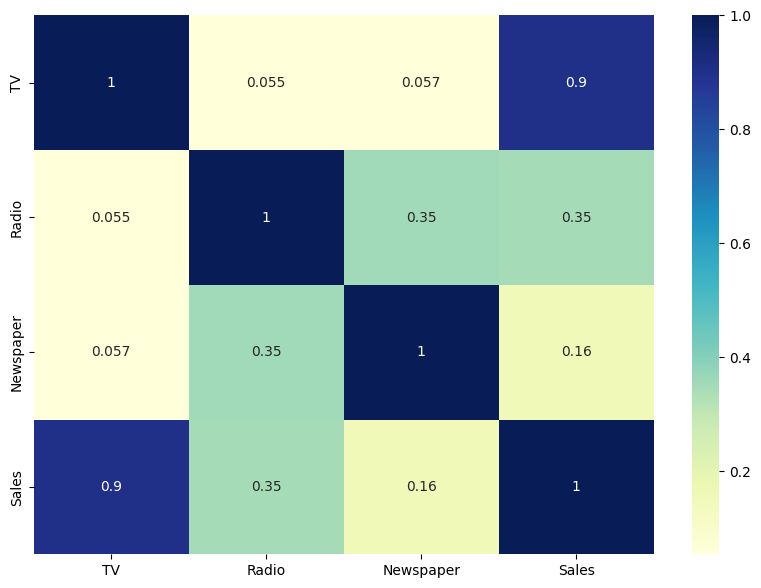

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [9]:
X = df["TV"]
y = df["Sales"]
print(X.shape,y.shape)

(200,) (200,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160,) (40,) (160,) (40,)


In [16]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train) #include a constant term or an intercept. 
lr = sm.OLS(y_train,X_train_sm).fit()
lr.params

const    7.007108
TV       0.055483
dtype: float64

In [18]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.71e-59
Time:                        19:02:10   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.000       6.289       7.725
TV             0.0555      0.002     26.251      0.000       0.051       0.060
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.767
Skew:                          -0.110   Prob(JB):                        0.681
Kurtosis:                       2.742   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

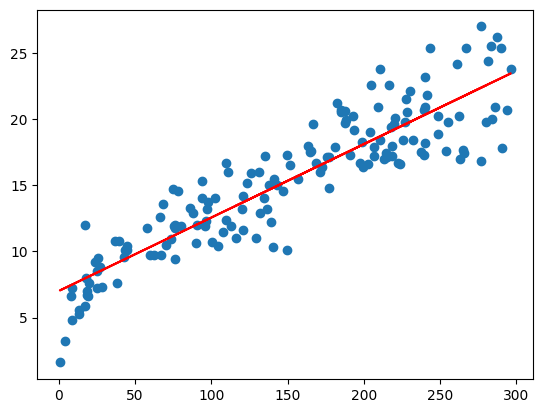

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 7.00710 + 0.055483*X_train,"r")
plt.show()

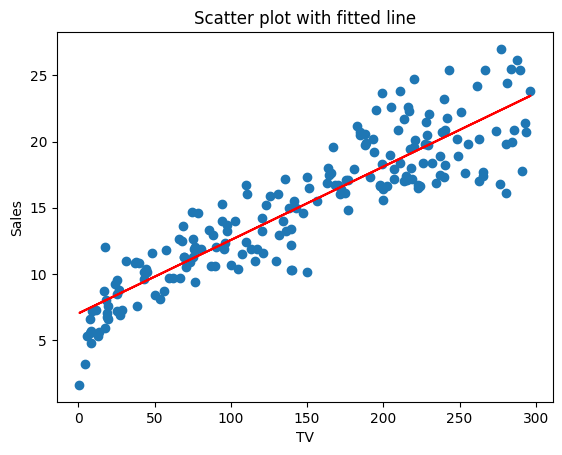

In [29]:
# Create scatter plot
plt.scatter(X, y)
plt.plot(X, lr.params[0] + lr.params[1] * X, "r")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Scatter plot with fitted line")

plt.show()

In [30]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\arunk\AppData\Local\Temp\ipykernel_6812\485972578.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


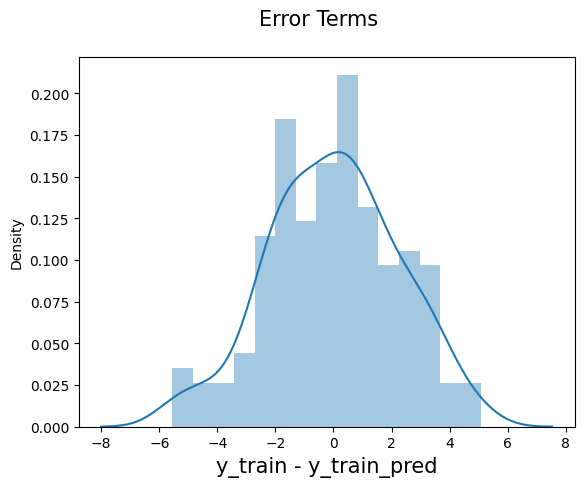

In [43]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle("Error Terms", fontsize = 15)
plt.xlabel("y_train - y_train_pred", fontsize = 15)
plt.show()

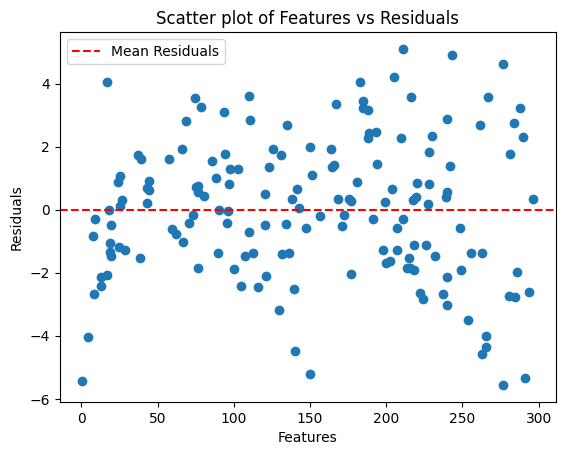

In [42]:
# Calculate residuals
res = lr.resid

# Create scatter plot of X_train vs residuals
plt.scatter(X_train, res)
plt.axhline(y=np.mean(res), color='r', linestyle='--', label='Mean Residuals')
plt.xlabel('Features')
plt.ylabel('Residuals')
plt.title('Scatter plot of Features vs Residuals')
plt.legend()
plt.show()

In [44]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [45]:
y_pred.head()

95     16.067473
15     17.848476
30     23.258063
158     7.656259
128    19.230001
dtype: float64

In [46]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
r_squared

0.802561303423698

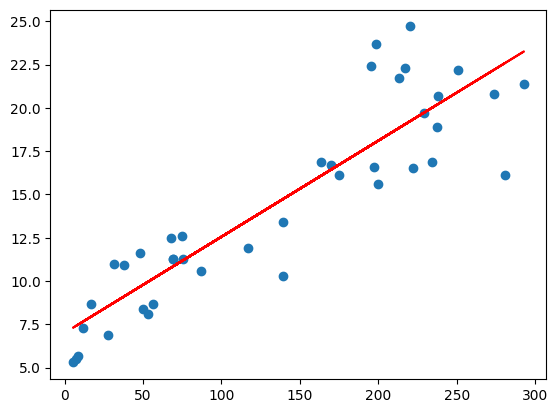

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.params[0] + lr.params[1] * X_test, "r")
plt.show()